In [330]:
#Import the usual library
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [331]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [332]:
#Melakukan pengecekan judul tiap kolom
judul_kolom = df.columns
print("Judul Kolom:\n", judul_kolom)

Judul Kolom:
 Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [333]:
#Pengecekan missing value pada tiap kolom
missing_data_per_column = df.isnull().sum()
columns_with_missing_data = missing_data_per_column[missing_data_per_column > 0]

if columns_with_missing_data.empty:
    print("Tidak ada data kosong di setiap kolom.")
else:
    print("Kolom-kolom dengan data kosong:\n", columns_with_missing_data)

Tidak ada data kosong di setiap kolom.


In [334]:
# Mengecek duplikasi pada kolom 'Order ID'
duplicate_order_ids = df[df.duplicated(subset=['Order ID'], keep=False)]

# Menampilkan baris yang memiliki duplikasi pada 'Order ID'
print("Duplikasi pada 'Order ID':")
print(duplicate_order_ids.head())

Duplikasi pada 'Order ID':
   Row ID          Order ID  Order Date  Date Key   Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109    Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109    Nathan Bell   
3       4  EMEA-2021-108966  10/11/2021  20211011     Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011     Zoe Hodges   
5       6  AMER-2020-115812    6/9/2020  20200609  Thomas Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
5  United States  New York City   AMER     NAMER        BNP Paribas   

   Customer ID Industry Segment                 Product     License     Sales  \
0         1017   Energy     SMB         Marketing Suite 

In [335]:
#Melakukan pengecekan format file
data_types = df.dtypes
print("Tipe data per kolom:\n", data_types)

Tipe data per kolom:
 Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [336]:
# Melakukan perubahan tipe data pada kolom tertentu 
# Mengubah format kolom menjadi tipe data tanggal secara otomatis
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Menampilkan tipe data setelah perubahan
print("Tipe Data Setelah Perubahan:\n", df['Order Date'].dtype)

# Mengubah tipe data kolom 'Customer ID' menjadi object
df['Customer ID'] = df['Customer ID'].astype(str)

# Menampilkan tipe data setelah perubahan
print("Tipe Data Setelah Perubahan:\n", df['Customer ID'].dtype)


Tipe Data Setelah Perubahan:
 datetime64[ns]
Tipe Data Setelah Perubahan:
 object


In [337]:
print(df.dtypes)

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID             object
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object


In [338]:
# Membuat kolom 'Year' berdasarkan 'Order Date'
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# Menyaring data untuk tahun 2023
df_2023 = df[df['Year'] == 2023]

# Menampilkan hasil
print(df_2023)

      Row ID          Order ID Order Date  Date Key       Contact Name  \
12        13  EMEA-2023-114412 2023-04-16  20230416      Adrian Hunter   
23        24  EMEA-2023-156909 2023-07-17  20230717         Luke Bower   
34        35   APJ-2023-107727 2023-10-20  20231020    Amelia Campbell   
41        42   APJ-2023-120999 2023-09-11  20230911       Karen Mathis   
43        44  EMEA-2023-139619 2023-09-20  20230920       Sophie Lewis   
...      ...               ...        ...       ...                ...   
9988    9989  EMEA-2023-163629 2023-11-18  20231118      Dylan Dickens   
9990    9991  AMER-2023-121258 2023-02-27  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258 2023-02-27  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258 2023-02-27  20230227  Anthony Sanderson   
9993    9994  AMER-2023-119914 2023-05-05  20230505   Jasmine Springer   

            Country        City Region Subregion             Customer  \
12           Sweden   Stockholm   EMEA

In [339]:
# Menambahkan kolom 'Bulan' berdasarkan 'Order Date'
df_2023['Bulan'] = df_2023['Order Date'].dt.month

# Menampilkan DataFrame dengan kolom baru
print(df_2023.head())

    Row ID          Order ID Order Date  Date Key     Contact Name    Country  \
12      13  EMEA-2023-114412 2023-04-16  20230416    Adrian Hunter     Sweden   
23      24  EMEA-2023-156909 2023-07-17  20230717       Luke Bower     France   
34      35   APJ-2023-107727 2023-10-20  20231020  Amelia Campbell      Japan   
41      42   APJ-2023-120999 2023-09-11  20230911     Karen Mathis  Australia   
43      44  EMEA-2023-139619 2023-09-20  20230920     Sophie Lewis    Germany   

          City Region Subregion             Customer  ... Industry  \
12   Stockholm   EMEA       NOR                Engie  ...   Energy   
23       Paris   EMEA   EU-WEST     Costco Wholesale  ...   Retail   
34       Tokyo    APJ      JAPN             Glencore  ...     Misc   
41  Wollongong    APJ       ANZ                Pemex  ...   Energy   
43     Hanover   EMEA   EU-WEST  Samsung Electronics  ...     Tech   

       Segment                 Product     License    Sales  Quantity  \
12         SMB     

C:\Users\USER\AppData\Local\Temp\ipykernel_10200\3792406512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Bulan'] = df_2023['Order Date'].dt.month


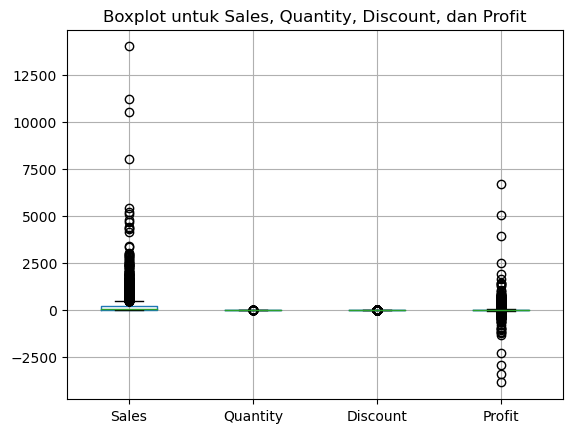

In [340]:
# Membuat boxplot untuk beberapa kolom
df_2023[['Sales', 'Quantity', 'Discount', 'Profit']].boxplot()
plt.title('Boxplot untuk Sales, Quantity, Discount, dan Profit')
plt.show()

In [341]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'Sales'
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Sales'
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Menghitung jumlah outliers pada kolom 'Sales'
outliers_sales = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]
count_outliers_sales = len(outliers_sales)
percentage_outliers_sales = (count_outliers_sales / len(df['Sales'])) * 100

# Menampilkan informasi outliers pada kolom 'Sales'
print(f"Jumlah Outliers pada kolom 'Sales': {count_outliers_sales}")
print(f"Persentase Outliers pada kolom 'Sales': {percentage_outliers_sales:.2f}%")

# Menghitung Q1, Q3, dan IQR untuk kolom 'Profit'
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Profit'
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Menghitung jumlah outliers pada kolom 'Profit'
outliers_profit = df[(df['Profit'] < lower_bound_profit) | (df['Profit'] > upper_bound_profit)]
count_outliers_profit = len(outliers_profit)
percentage_outliers_profit = (count_outliers_profit / len(df['Profit'])) * 100

# Menampilkan informasi outliers pada kolom 'Profit'
print(f"\nJumlah Outliers pada kolom 'Profit': {count_outliers_profit}")
print(f"Persentase Outliers pada kolom 'Profit': {percentage_outliers_profit:.2f}%")

Jumlah Outliers pada kolom 'Sales': 1167
Persentase Outliers pada kolom 'Sales': 11.68%

Jumlah Outliers pada kolom 'Profit': 1881
Persentase Outliers pada kolom 'Profit': 18.82%


In [342]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'Sales'
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Sales'
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Menghapus outliers pada kolom 'Sales'
df = df[(df['Sales'] >= lower_bound_sales) & (df['Sales'] <= upper_bound_sales)]

# Menghitung Q1, Q3, dan IQR untuk kolom 'Profit'
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Profit'
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Menghapus outliers pada kolom 'Profit'
df = df[(df['Profit'] >= lower_bound_profit) & (df['Profit'] <= upper_bound_profit)]

# Menampilkan informasi setelah menghapus outliers
print("Jumlah baris setelah menghapus outliers:", len(df))

Jumlah baris setelah menghapus outliers: 7392


In [343]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'Sales'
Q1_sales = df_2023['Sales'].quantile(0.25)
Q3_sales = df_2023['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Sales'
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Menghitung jumlah outliers pada kolom 'Sales'
outliers_sales = df_2023[(df_2023['Sales'] < lower_bound_sales) | (df_2023['Sales'] > upper_bound_sales)]
count_outliers_sales = len(outliers_sales)
percentage_outliers_sales = (count_outliers_sales / len(df_2023['Sales'])) * 100

# Menampilkan informasi outliers pada kolom 'Sales'
print(f"Jumlah Outliers pada kolom 'Sales': {count_outliers_sales}")
print(f"Persentase Outliers pada kolom 'Sales': {percentage_outliers_sales:.2f}%")

# Menghitung Q1, Q3, dan IQR untuk kolom 'Profit'
Q1_profit = df_2023['Profit'].quantile(0.25)
Q3_profit = df_2023['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Profit'
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Menghitung jumlah outliers pada kolom 'Profit'
outliers_profit = df_2023[(df_2023['Profit'] < lower_bound_profit) | (df_2023['Profit'] > upper_bound_profit)]
count_outliers_profit = len(outliers_profit)
percentage_outliers_profit = (count_outliers_profit / len(df_2023['Profit'])) * 100

# Menampilkan informasi outliers pada kolom 'Profit'
print(f"\nJumlah Outliers pada kolom 'Profit': {count_outliers_profit}")
print(f"Persentase Outliers pada kolom 'Profit': {percentage_outliers_profit:.2f}%")

Jumlah Outliers pada kolom 'Sales': 366
Persentase Outliers pada kolom 'Sales': 11.03%

Jumlah Outliers pada kolom 'Profit': 639
Persentase Outliers pada kolom 'Profit': 19.25%


In [344]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'Sales'
Q1_sales = df_2023['Sales'].quantile(0.25)
Q3_sales = df_2023['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Sales'
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Menghapus outliers pada kolom 'Sales'
df_2023 = df_2023[(df_2023['Sales'] >= lower_bound_sales) & (df_2023['Sales'] <= upper_bound_sales)]

# Menghitung Q1, Q3, dan IQR untuk kolom 'Profit'
Q1_profit = df_2023['Profit'].quantile(0.25)
Q3_profit = df_2023['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Menentukan batas bawah dan batas atas untuk deteksi outliers pada kolom 'Profit'
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Menghapus outliers pada kolom 'Profit'
df_2023 = df_2023[(df_2023['Profit'] >= lower_bound_profit) & (df_2023['Profit'] <= upper_bound_profit)]

# Menampilkan informasi setelah menghapus outliers
print("Jumlah baris setelah menghapus outliers:", len(df_2023))

Jumlah baris setelah menghapus outliers: 2473


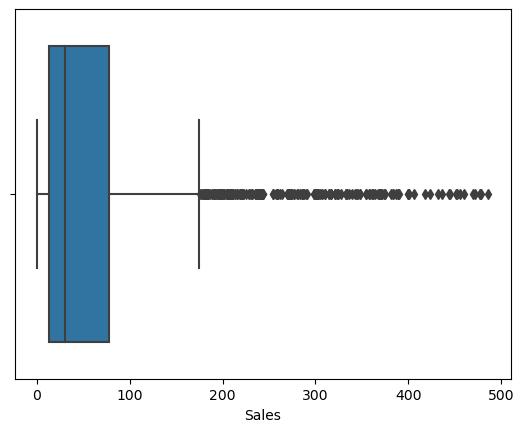

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat boxplot untuk kolom tertentu (contoh: 'Sales')
sns.boxplot(x=df_2023['Sales'])
plt.show()

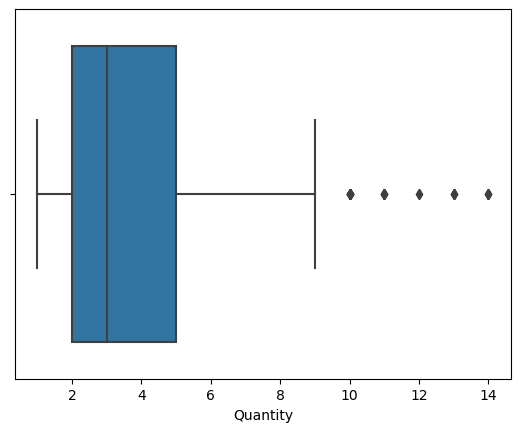

In [346]:
# Membuat boxplot untuk kolom tertentu (contoh: 'Sales')
sns.boxplot(x=df_2023['Quantity'])
plt.show()

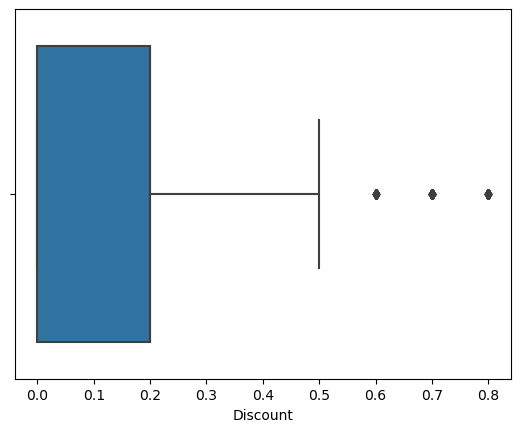

In [347]:
# Membuat boxplot untuk kolom tertentu (contoh: 'Sales')
sns.boxplot(x=df_2023['Discount'])
plt.show()

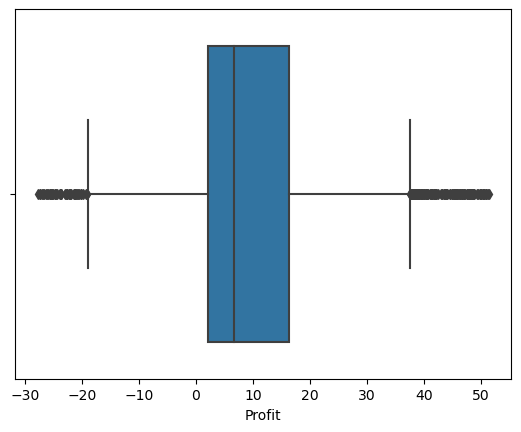

In [348]:
# Membuat boxplot untuk kolom tertentu (contoh: 'Sales')
sns.boxplot(x=df_2023['Profit'])
plt.show()

In [349]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 12 to 9992
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        2473 non-null   int64         
 1   Order ID      2473 non-null   object        
 2   Order Date    2473 non-null   datetime64[ns]
 3   Date Key      2473 non-null   int64         
 4   Contact Name  2473 non-null   object        
 5   Country       2473 non-null   object        
 6   City          2473 non-null   object        
 7   Region        2473 non-null   object        
 8   Subregion     2473 non-null   object        
 9   Customer      2473 non-null   object        
 10  Customer ID   2473 non-null   object        
 11  Industry      2473 non-null   object        
 12  Segment       2473 non-null   object        
 13  Product       2473 non-null   object        
 14  License       2473 non-null   object        
 15  Sales         2473 non-null   float64     

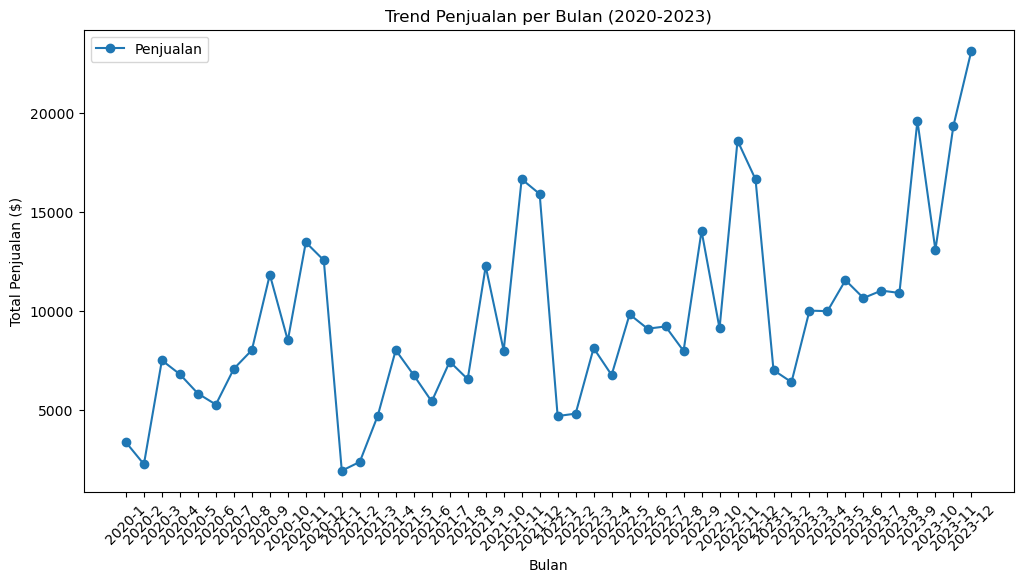

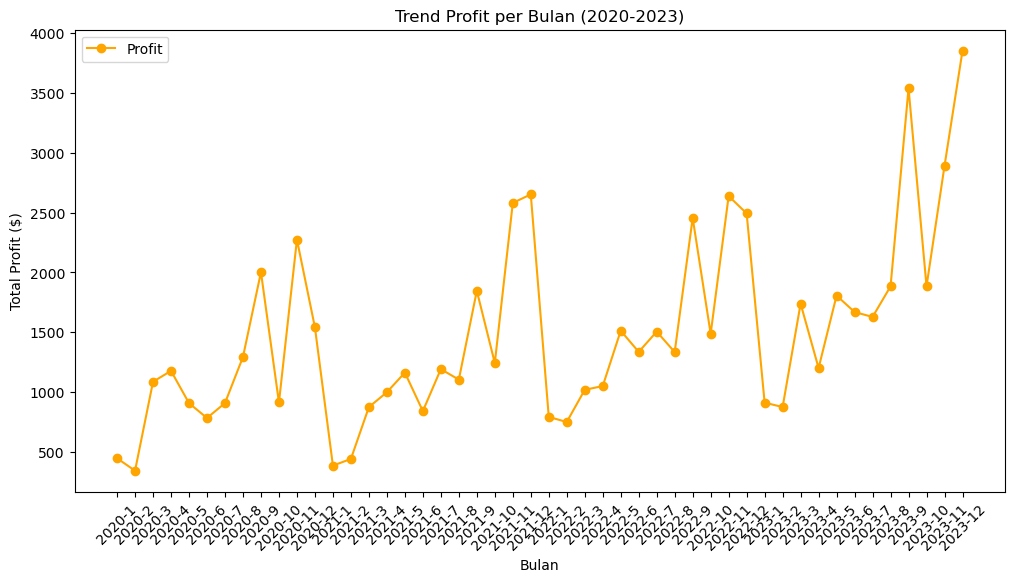

In [350]:
# Mengonversi kolom 'Order Date' ke tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menambahkan kolom bulan dan tahun
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Mengelompokkan data berdasarkan bulan dan tahun, kemudian menghitung total penjualan dan profit
monthly_data = df.groupby(['Year', 'Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Membuat plot trend penjualan
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Sales'], label='Penjualan', marker='o')
plt.title('Trend Penjualan per Bulan (2020-2023)')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Membuat plot trend profit
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Profit'], label='Profit', marker='o', color='orange')
plt.title('Trend Profit per Bulan (2020-2023)')
plt.xlabel('Bulan')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


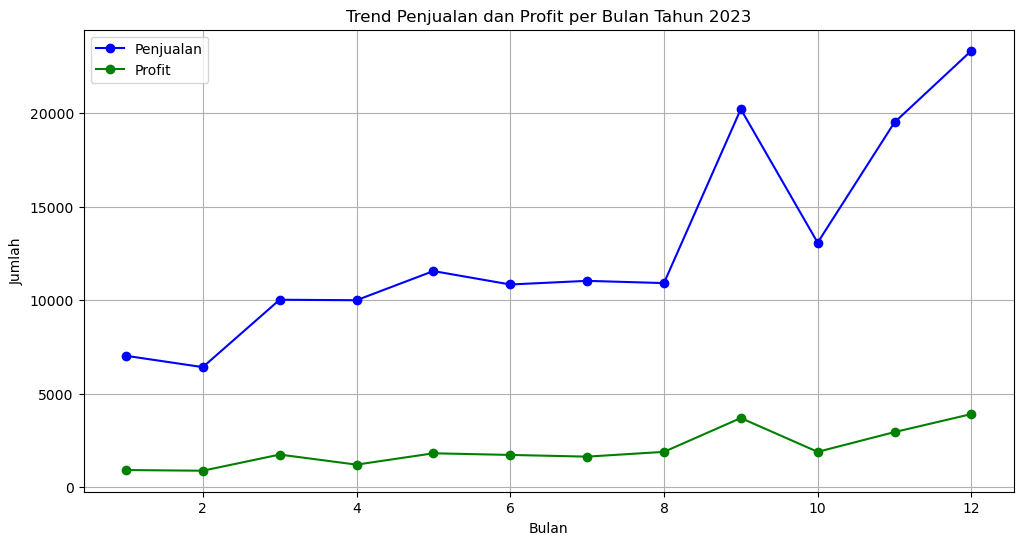

In [351]:
# Menghitung total penjualan dan profit per bulan
monthly_sales = df_2023.groupby('Bulan')['Sales'].sum()
monthly_profit = df_2023.groupby('Bulan')['Profit'].sum()

# Membuat plot trend penjualan
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', label='Penjualan', color='blue')

# Membuat plot trend profit
plt.plot(monthly_profit.index, monthly_profit, marker='o', label='Profit', color='green')

# Menambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Trend Penjualan dan Profit per Bulan Tahun 2023')
plt.legend()
plt.grid(True)
plt.show()

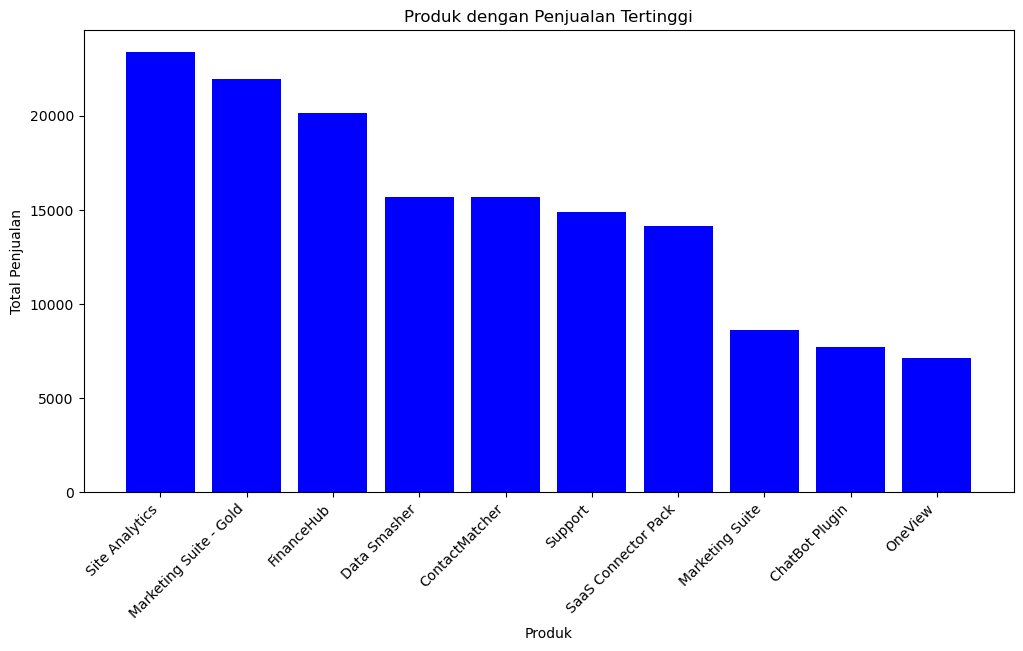

In [352]:
# Menghitung total penjualan per produk
product_sales = df_2023.groupby('Product')['Sales'].sum().reset_index()

# Menyortir data berdasarkan total penjualan secara menurun
top_selling_products = product_sales.sort_values(by='Sales', ascending=False).head(10)  # Mengambil 10 produk teratas

# Membuat bar chart untuk produk dengan penjualan tertinggi
plt.figure(figsize=(12, 6))
plt.bar(top_selling_products['Product'], top_selling_products['Sales'], color='blue')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.title('Produk dengan Penjualan Tertinggi')
plt.xticks(rotation=45, ha='right')
plt.show()

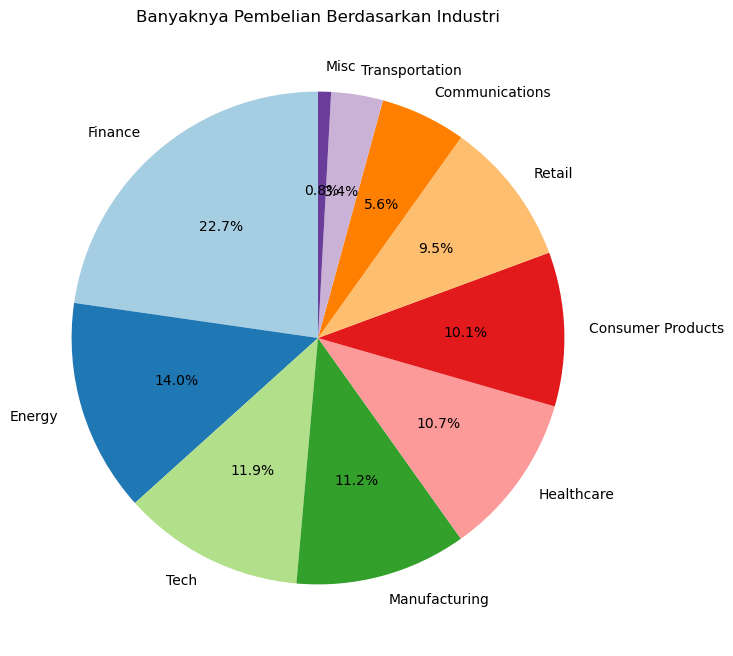

In [353]:
# Menghitung banyaknya pembelian per industri
industry_purchases = df_2023['Industry'].value_counts()

# Membuat pie chart untuk banyaknya pembelian berdasarkan industri
plt.figure(figsize=(8, 8))
plt.pie(industry_purchases, labels=industry_purchases.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Banyaknya Pembelian Berdasarkan Industri')
plt.show()


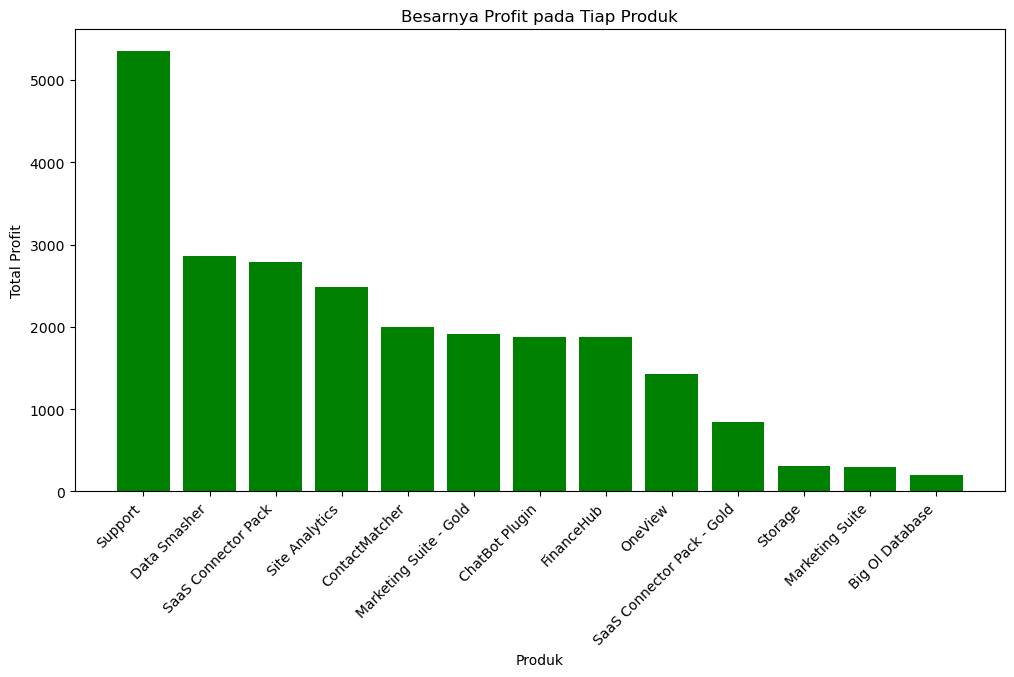

In [354]:
# Menghitung total profit per produk
product_profit = df_2023.groupby('Product')['Profit'].sum().reset_index()

# Mengurutkan berdasarkan total profit secara descending
sorted_product_profit = product_profit.sort_values(by='Profit', ascending=False)

# Membuat bar chart untuk besarnya profit pada tiap produk setelah diurutkan
plt.figure(figsize=(12, 6))
plt.bar(sorted_product_profit['Product'], sorted_product_profit['Profit'], color='green')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.title('Besarnya Profit pada Tiap Produk')
plt.xticks(rotation=45, ha='right')
plt.show()

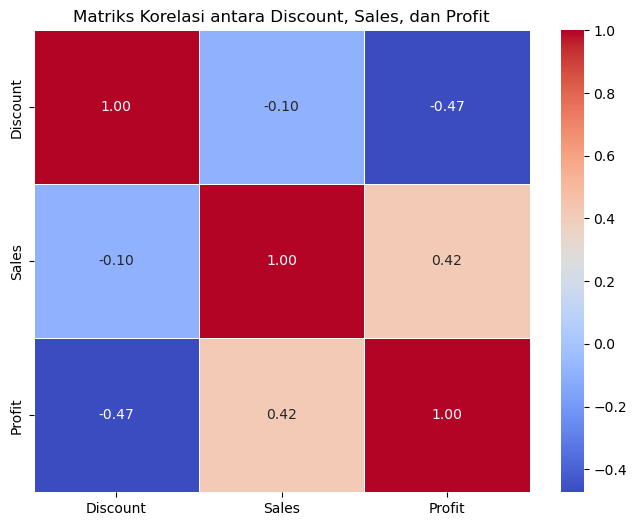

In [355]:
# Menghitung korelasi antara 'Discount', 'Sales', dan 'Profit'
correlation_matrix = df_2023[['Discount', 'Sales', 'Profit']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi antara Discount, Sales, dan Profit')
plt.show()


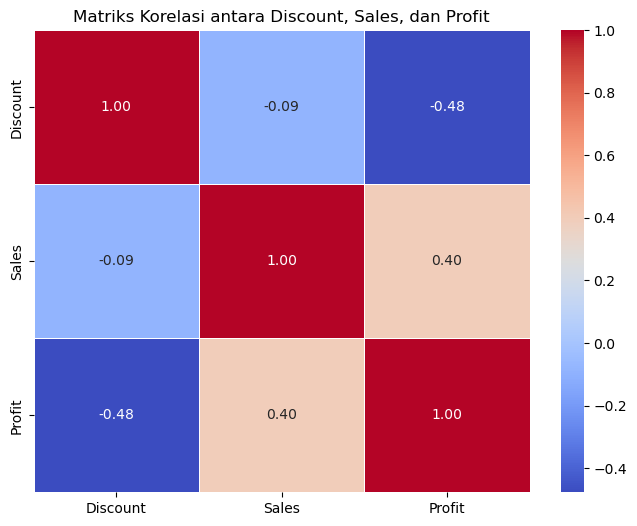

In [356]:
# Menghitung korelasi antara 'Discount', 'Sales', dan 'Profit'
correlation_matrix = df[['Discount', 'Sales', 'Profit']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi antara Discount, Sales, dan Profit')
plt.show()


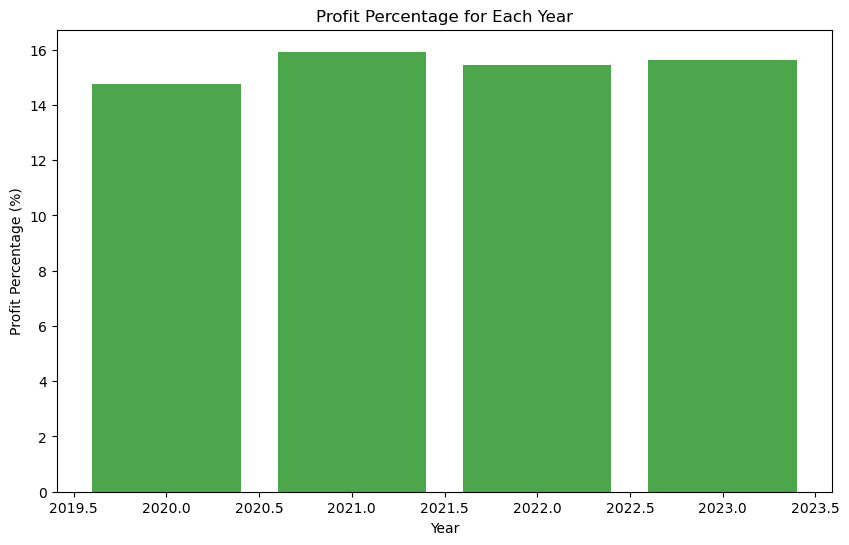

In [357]:
# Menghitung total sales dan total profit untuk setiap tahun
summary_by_year = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'})

# Menambahkan kolom 'Profit Percentage' yang berisi rasio profit terhadap sales
summary_by_year['Profit Percentage'] = (summary_by_year['Profit'] / summary_by_year['Sales']) * 100

# Plotting bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_by_year.index, summary_by_year['Profit Percentage'], color='green', alpha=0.7)

plt.title('Profit Percentage for Each Year')
plt.xlabel('Year')
plt.ylabel('Profit Percentage (%)')
plt.xticks(rotation=0)
plt.show()

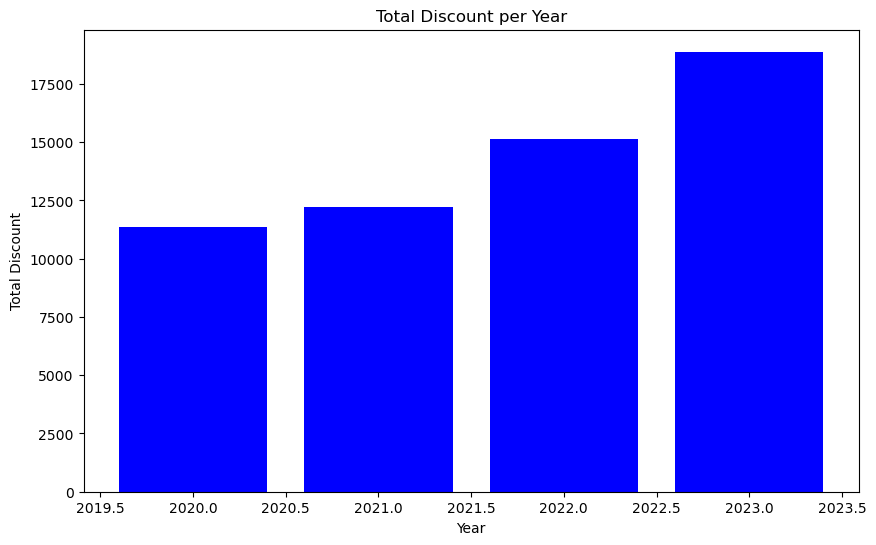

In [358]:
# Membuat kolom baru 'Total Discount' dengan mengalikan 'Discount' dengan 'Sales'
df['Total Discount'] = df['Discount'] * df['Sales']

# Menghitung total diskon setiap tahun
total_discount_by_year = df.groupby('Year')['Total Discount'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_discount_by_year['Year'], total_discount_by_year['Total Discount'], color='blue')
plt.title('Total Discount per Year')
plt.xlabel('Year')
plt.ylabel('Total Discount')
plt.show()


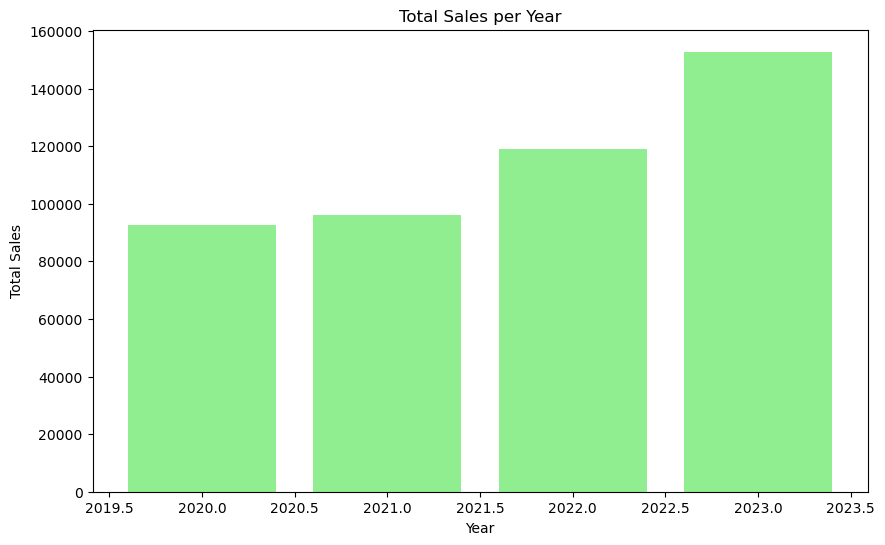

In [359]:
# Menghitung total penjualan setiap tahun
total_sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(total_sales_by_year['Year'], total_sales_by_year['Sales'], color='lightgreen')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

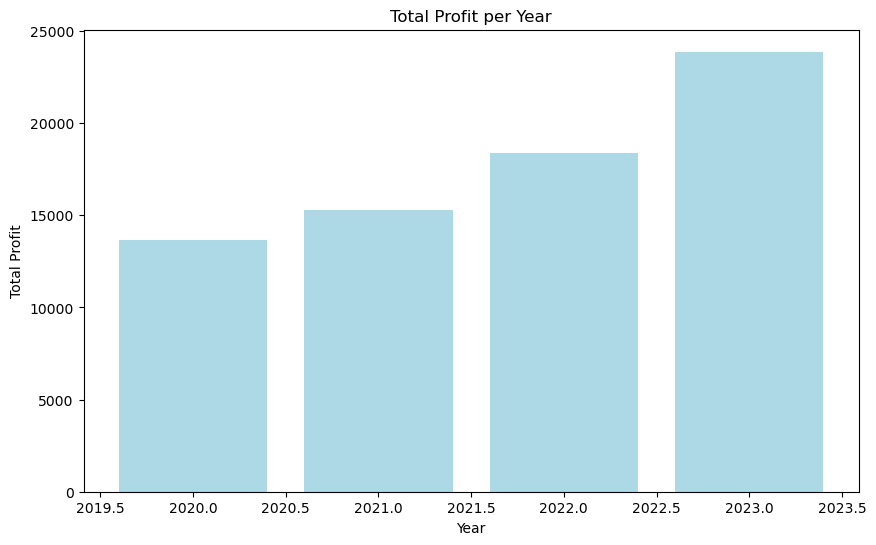

In [360]:
# Menghitung total profit setiap tahun
total_profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(total_profit_by_year['Year'], total_profit_by_year['Profit'], color='lightblue')
plt.title('Total Profit per Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

In [361]:
df_2023.to_excel('SaaS-Sales.xlsx', index=False)